In [ ]:
import torch
import torchtext
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

device= torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device availble for runing:")
print(device)

Device availble for runing:
cpu


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import os
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
import tensorflow as tf
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#Loading the audio
def load_audio_file(file_path):
  input_length = 1440
  data = librosa.core.load(file_path)[0]
  if len(data)>input_length:
    data = data[:input_length]
  else:
    data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
  return data


In [ ]:
paths=[]
labels=[]

for dirname, _, filenames in os.walk('/content/drive/MyDrive/RAVDESS/Audiofile'):
  for filename in filenames:
      path = os.path.dirname(dirname)
      paths.append(os.path.join(dirname, filename))
      label = filename[6:8]
      if label == '01':
           #neutral
            label = 0
      if label == '02':
            #calm
           label = 1
      if label == '03':
           #happy
           label = 2
      if label == '06':
           #fear
          label = 3
      if label == '05':
           #angry
            label = 4
      if label == '04':
            #sad
           label = 5
      if label == '07':
          #disgust
         label = 6
      if label == '08':
         #surprise
           label = 7
      labels.append(label)


print("Dataset is loaded")


Dataset is loaded


In [ ]:
#dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()
print(df)

                                                 speech  label
0     /content/drive/MyDrive/RAVDESS/Audiofile/Actor...      1
1     /content/drive/MyDrive/RAVDESS/Audiofile/Actor...      1
2     /content/drive/MyDrive/RAVDESS/Audiofile/Actor...      1
3     /content/drive/MyDrive/RAVDESS/Audiofile/Actor...      0
4     /content/drive/MyDrive/RAVDESS/Audiofile/Actor...      0
...                                                 ...    ...
1435  /content/drive/MyDrive/RAVDESS/Audiofile/Actor...      6
1436  /content/drive/MyDrive/RAVDESS/Audiofile/Actor...      7
1437  /content/drive/MyDrive/RAVDESS/Audiofile/Actor...      7
1438  /content/drive/MyDrive/RAVDESS/Audiofile/Actor...      6
1439  /content/drive/MyDrive/RAVDESS/Audiofile/Actor...      7

[1440 rows x 2 columns]


7

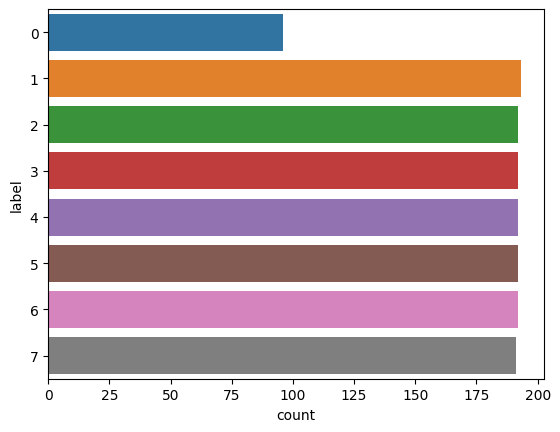

In [ ]:
#ploting Label
import seaborn as sns
sns.countplot(data=df, y='label')
label

In [ ]:
#method to map waveplot of emotions
def waveplot(data, sr, emotion):
  plt.figure(figsize=(10,4))
  plt.title(emotion, size=20)
  librosa.display.waveshow(data, sr=sr)
  plt.show()
  #method to map spectogram of emotion
def spectogram(data, sr, emotion):
  x = librosa.stft(data)
  xdb = librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(11,4))
  plt.title(emotion, size=20)
  librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar()

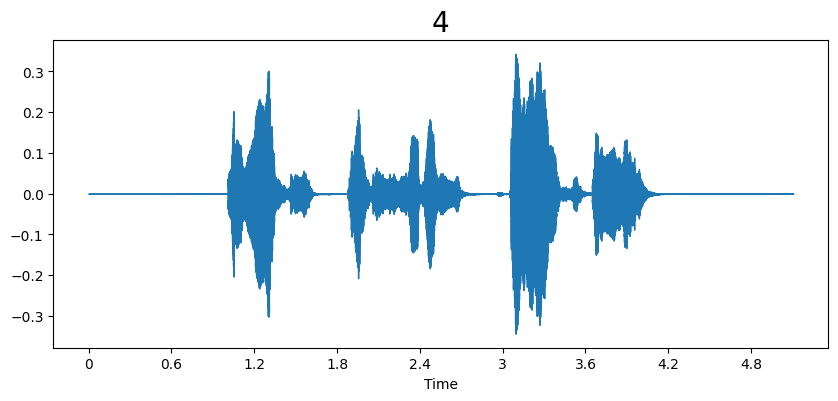

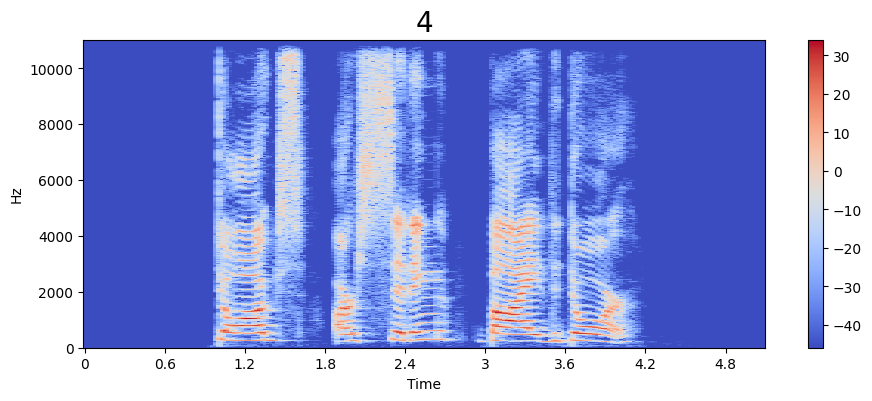

In [ ]:
#mapping waveplot and spectogram of angry
emotion = 4
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

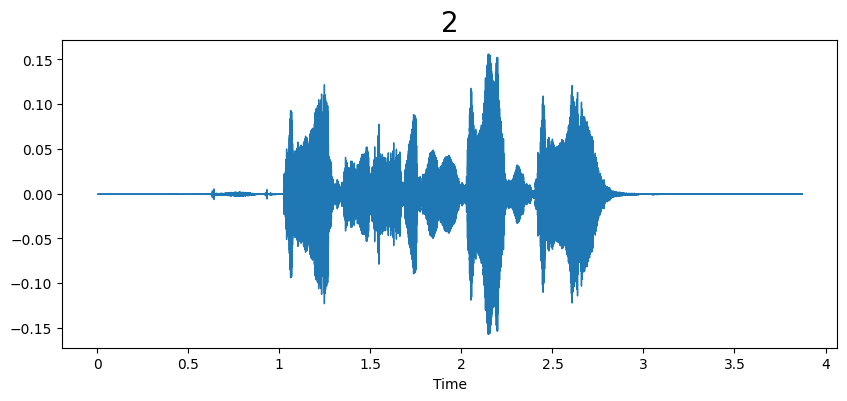

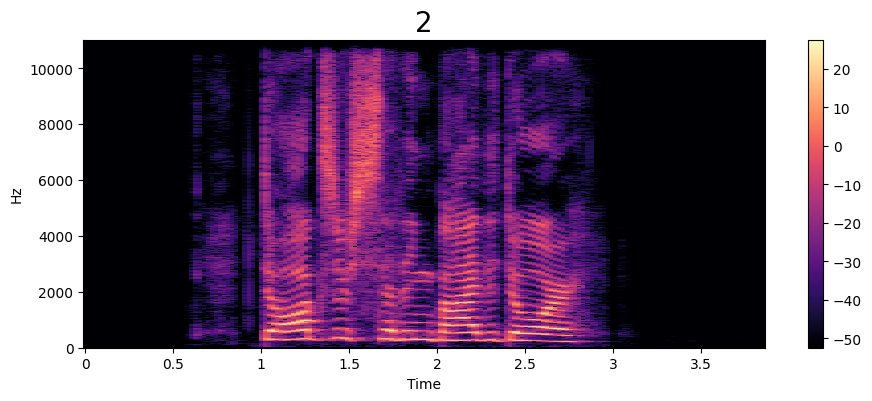

In [ ]:
#mapping waveplot and spectogram of happy
emotion = 2
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

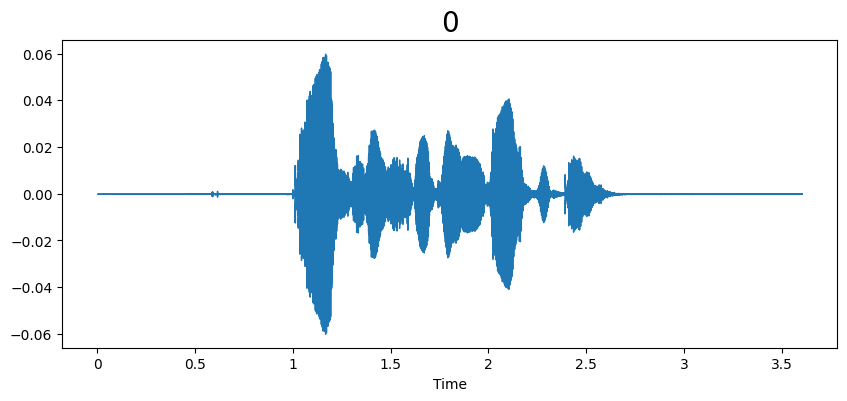

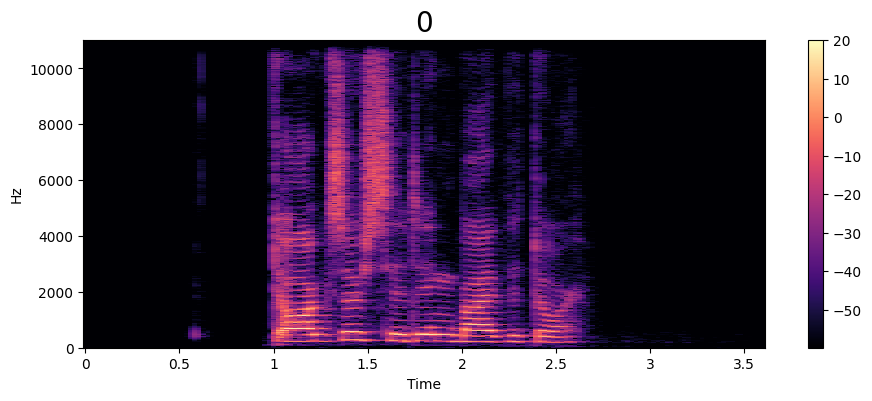

In [ ]:
#mapping waveplot and spectogram of neutral
emotion = 0
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

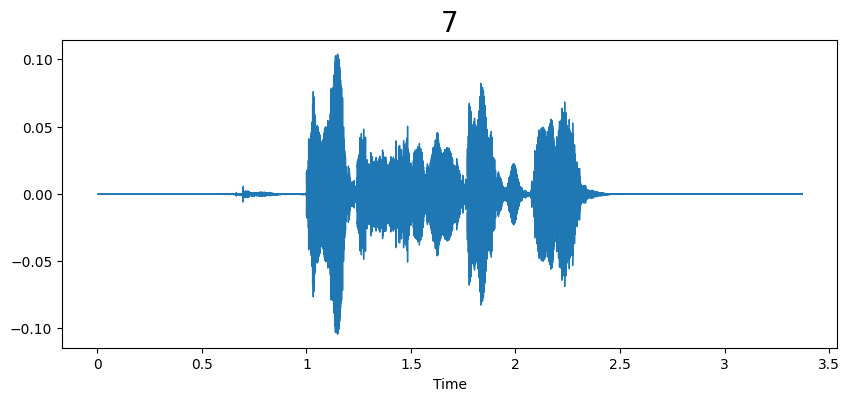

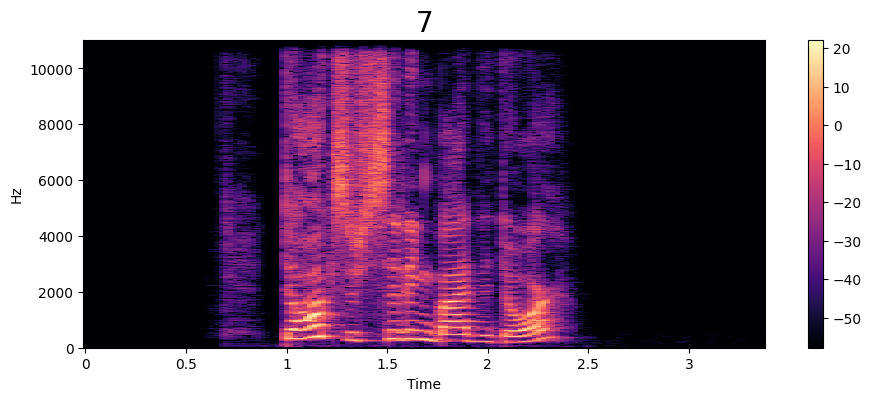

In [ ]:
#mapping waveplot and spectogram of surprise
emotion = 7
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

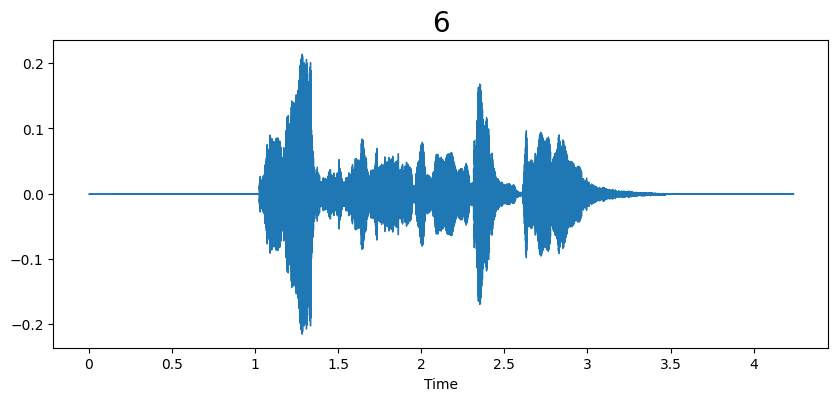

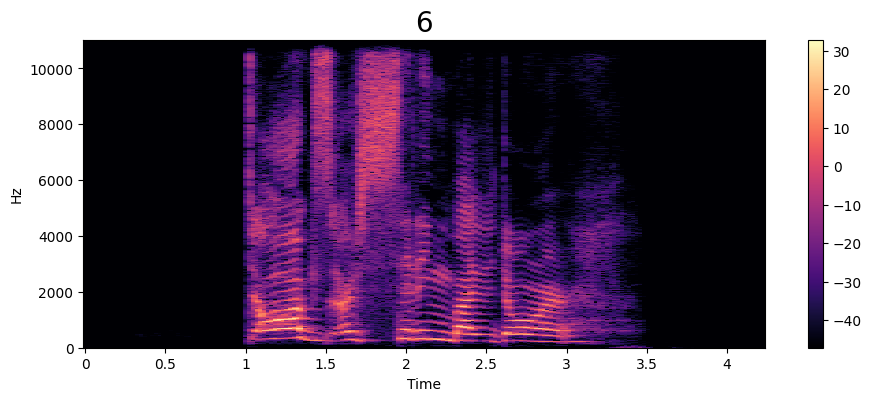

In [ ]:
#mapping waveplot and spectogram of disgust
emotion = 6
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

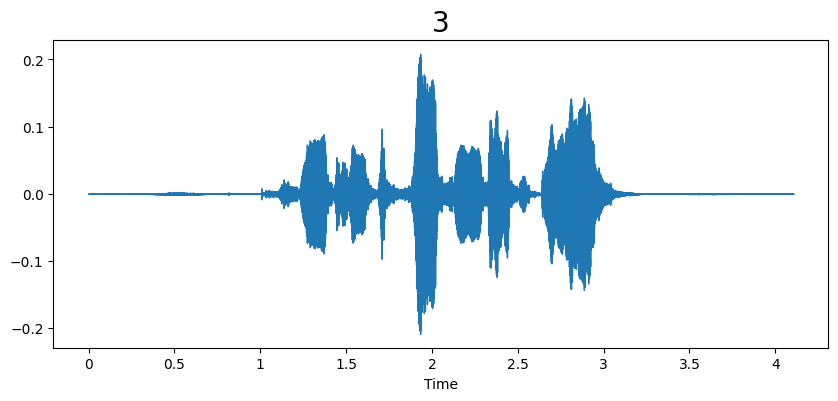

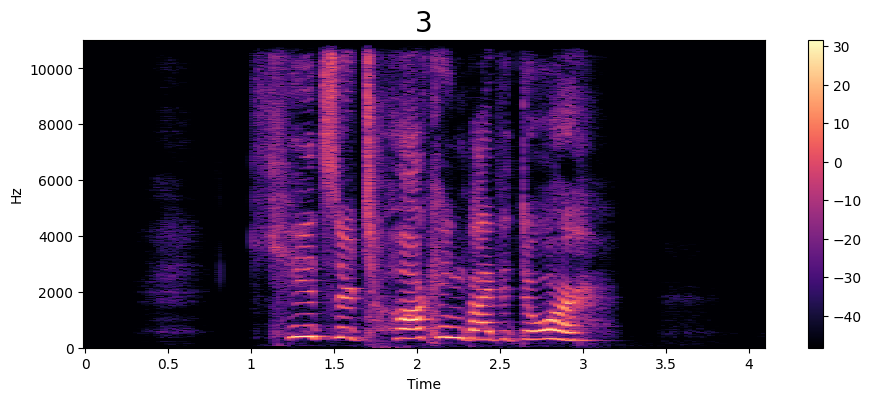

In [ ]:
#mapping waveplot and spectogram of fear
emotion = 3
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

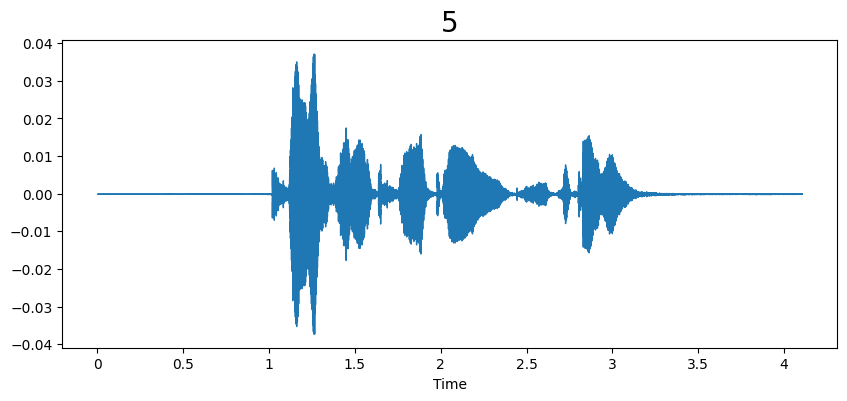

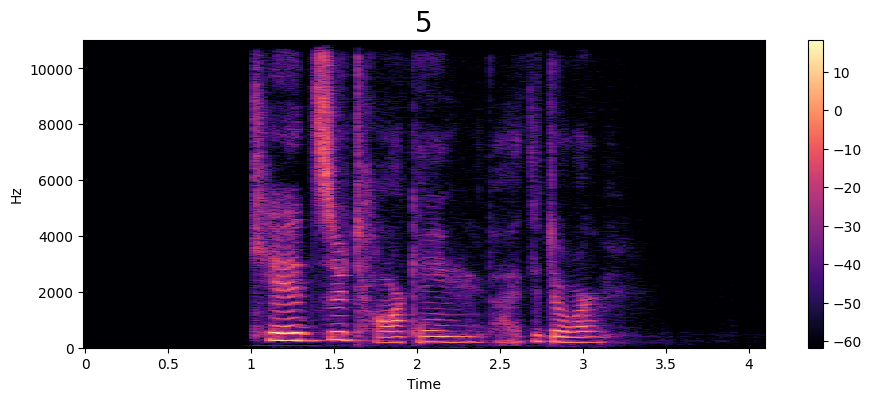

In [ ]:
#mapping waveplot and spectogram of sad
emotion = 5
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

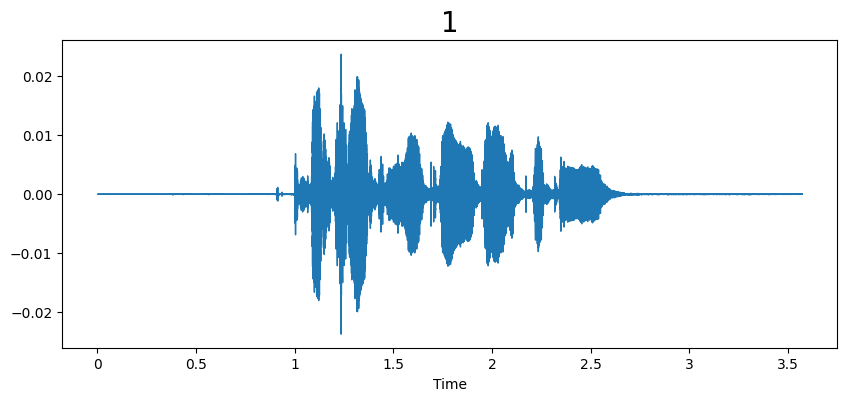

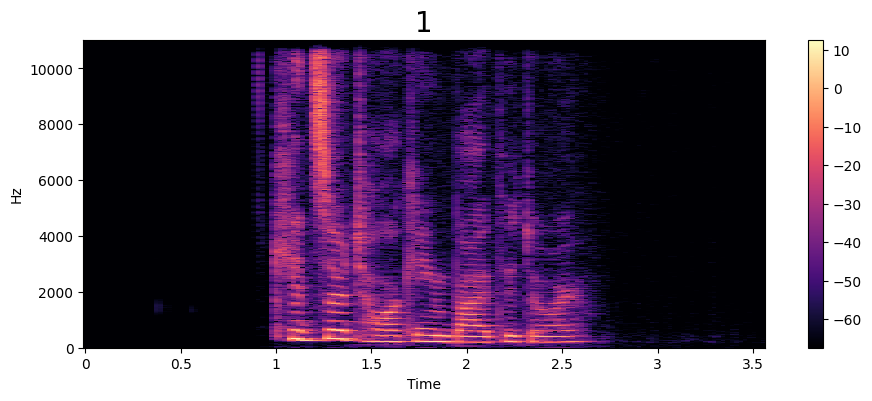

In [ ]:
#mapping waveplot and spectogram of calm
emotion = 1
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
path=np.array(df['speech'])
path

array(['/content/drive/MyDrive/RAVDESS/Audiofile/Actor_24/03-01-02-01-01-01-24.wav',
       '/content/drive/MyDrive/RAVDESS/Audiofile/Actor_24/03-01-02-01-01-02-24.wav',
       '/content/drive/MyDrive/RAVDESS/Audiofile/Actor_24/03-01-02-01-02-02-24.wav',
       ...,
       '/content/drive/MyDrive/RAVDESS/Audiofile/Actor_04/03-01-08-02-02-02-04.wav',
       '/content/drive/MyDrive/RAVDESS/Audiofile/Actor_04/03-01-07-02-02-01-04.wav',
       '/content/drive/MyDrive/RAVDESS/Audiofile/Actor_04/03-01-08-02-01-02-04.wav'],
      dtype=object)

In [ ]:
#method for extracting feature extraction using MFCC
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-7.1079248e+02,  4.7176361e+01, -3.8070750e+00,  4.4549503e+00,
       -4.3975706e+00, -7.0048089e+00, -1.3492141e+01, -1.5595019e+01,
       -1.0649929e+01, -8.3106337e+00, -9.5539589e+00, -4.8724480e+00,
       -9.7493181e+00, -6.2109065e+00, -3.7128375e+00, -7.7603693e+00,
       -4.6057835e+00, -3.4324799e+00, -4.4776678e+00, -3.0753636e+00,
       -1.7797621e+00,  1.8873813e+00,  2.0784218e+00,  2.0646689e+00,
       -8.1359071e-01, -9.2649680e-01, -2.4591243e+00,  1.0435776e+00,
       -1.9414051e-01,  1.3393888e+00,  3.9891058e-01,  4.9299278e+00,
        8.2559156e+00,  1.0321612e+01,  7.1807661e+00,  3.8245428e+00,
        2.8830132e-01, -7.6722652e-01, -1.4047959e+00, -1.9634470e-01],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-710.7925, 47.17636, -3.807075, 4.4549503, -4...
1       [-716.80286, 51.303875, -1.2702309, 3.7705736,...
2       [-656.247, 49.358616, 3.5867383, 0.8763847, -1...
3       [-647.78534, 47.443676, -5.886162, 4.666517, -...
4       [-648.326, 52.6482, -8.608706, 4.927527, -10.5...
                              ...                        
1435    [-522.34467, 33.765022, -9.423977, 1.1934909, ...
1436    [-557.3058, 40.801468, -15.366851, 1.3576043, ...
1437    [-449.57913, 28.988592, -17.052877, -7.188919,...
1438    [-508.0005, 37.212624, -13.825323, -3.7663486,...
1439    [-468.1582, 26.683504, -19.705769, -5.1897306,...
Name: speech, Length: 1440, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(1440, 40)

In [ ]:
# from openpyxl import load_workbook
data_frame1 = pd.DataFrame(X)
data_frame2 = pd.DataFrame(labels)
data_frame2.rename(columns={data_frame2.columns[0]:"label" }, inplace=True)

result = pd.concat([data_frame1,data_frame2], axis=1)
result.to_excel("features_ravdessdata.xlsx", sheet_name="features", index=False)


print("All data successfully added")

All data successfully added


In [ ]:
import librosa
from librosa import display
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
Database=pd.read_excel("/content/features_ravdessdata.xlsx")
D=Database.shape
X1=Database.iloc[:,:-1].values
y1=Database.iloc[:,D[1]-1].values
y1=y1.astype(int)
print(y1)
print(X1)

[1 1 1 ... 7 6 7]
[[-7.10792480e+02  4.71763611e+01 -3.80707502e+00 ... -7.67226517e-01
  -1.40479589e+00 -1.96344703e-01]
 [-7.16802856e+02  5.13038750e+01 -1.27023089e+00 ... -2.61032939e+00
  -2.49417686e+00  3.78933907e-01]
 [-6.56247009e+02  4.93586159e+01  3.58673835e+00 ... -8.58172536e-01
  -1.66519737e+00  1.39965725e+00]
 ...
 [-4.49579132e+02  2.89885921e+01 -1.70528774e+01 ...  1.77610898e+00
  -4.91869926e-01  2.26375341e-01]
 [-5.08000488e+02  3.72126236e+01 -1.38253231e+01 ... -9.05947030e-01
  -1.63520038e+00 -5.48171520e-01]
 [-4.68158203e+02  2.66835041e+01 -1.97057686e+01 ... -1.13609779e+00
  -2.12237453e+00  2.41066146e+00]]


In [ ]:
print(X1.shape)
print(y1.shape)

(1440, 40)
(1440,)


In [ ]:
## input split
X = np.expand_dims(X1, -1)
print(X.shape)

#y = np.expand_dims(y1, -1)
#print(y.shape)

(1440, 40, 1)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(Database[['label']])

In [ ]:
print(y)

  (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 1)	1.0
  (7, 1)	1.0
  (8, 1)	1.0
  (9, 1)	1.0
  (10, 0)	1.0
  (11, 2)	1.0
  (12, 5)	1.0
  (13, 5)	1.0
  (14, 4)	1.0
  (15, 2)	1.0
  (16, 5)	1.0
  (17, 1)	1.0
  (18, 5)	1.0
  (19, 2)	1.0
  (20, 3)	1.0
  (21, 5)	1.0
  (22, 4)	1.0
  (23, 2)	1.0
  (24, 4)	1.0
  :	:
  (1415, 6)	1.0
  (1416, 6)	1.0
  (1417, 5)	1.0
  (1418, 6)	1.0
  (1419, 3)	1.0
  (1420, 3)	1.0
  (1421, 4)	1.0
  (1422, 5)	1.0
  (1423, 4)	1.0
  (1424, 4)	1.0
  (1425, 4)	1.0
  (1426, 5)	1.0
  (1427, 7)	1.0
  (1428, 7)	1.0
  (1429, 6)	1.0
  (1430, 7)	1.0
  (1431, 6)	1.0
  (1432, 6)	1.0
  (1433, 7)	1.0
  (1434, 7)	1.0
  (1435, 6)	1.0
  (1436, 7)	1.0
  (1437, 7)	1.0
  (1438, 6)	1.0
  (1439, 7)	1.0


In [ ]:
y = y.toarray()

In [ ]:
# y.shape
#y[1].shape
print(y)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
X.shape

(1440, 40, 1)

In [ ]:
import tensorflow as tf
# import tensorflow.keras
from tensorflow import keras
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
#from tensorflow.keras import optimizers
#from tensorflow.keras.optimizers import rmsprop_v2
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import LSTM,Masking,concatenate,AveragePooling1D, BatchNormalization

In [ ]:
#Creating the LSTM model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=512, input_shape = (40,1), return_sequences = False))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(8,activation='softmax')) #Changed 7 to 8 for RAVDESS

# opt = keras.optimizers.RMSprop( learning_rate=0.00005, rho=0.9, epsilon= None)
# model.compile(loss='sparse_categorical_crossentropy', optimizer= opt, metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 512)               1052672   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8

In [ ]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=32)

Epoch 1/50
36/36 [==============================] - 23s 547ms/step - loss: 2.0455 - accuracy: 0.1840 - val_loss: 2.0757 - val_accuracy: 0.1562
Epoch 2/50
36/36 [==============================] - 19s 515ms/step - loss: 2.0370 - accuracy: 0.1927 - val_loss: 2.0124 - val_accuracy: 0.1944
Epoch 3/50
36/36 [==============================] - 19s 518ms/step - loss: 1.9730 - accuracy: 0.2161 - val_loss: 1.9602 - val_accuracy: 0.2361
Epoch 4/50
36/36 [==============================] - 18s 491ms/step - loss: 2.0076 - accuracy: 0.1962 - val_loss: 1.8808 - val_accuracy: 0.2535
Epoch 5/50
36/36 [==============================] - 18s 491ms/step - loss: 1.9511 - accuracy: 0.2509 - val_loss: 1.9168 - val_accuracy: 0.2778
Epoch 6/50
36/36 [==============================] - 18s 489ms/step - loss: 1.9343 - accuracy: 0.2326 - val_loss: 1.9501 - val_accuracy: 0.2743
Epoch 7/50
36/36 [==============================] - 18s 496ms/step - loss: 1.9157 - accuracy: 0.2465 - val_loss: 1.9253 - val_accuracy: 0.2535

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print(X1_train.shape)
print(y1_train.shape)

(1152, 40, 1)
(1152, 8)


In [ ]:
# from sklearn.model_selection import KFold
from sklearn.model_selection import KFold
FOLDS = 5
#folds = 5
kf = KFold(FOLDS)
# print(kf)
# X,y = kf.split(X1_train,y1_train)
# print(X,y)
folds = list(kf.split(X1_train,y1_train))

for i, (train, test) in enumerate(folds):
           X_train_kf =    X1_train[train]
           y_train_kf =    y1_train[train]
           X_test_kf =     X1_train[test]
           y_test_kf =     y1_train[test]
          #  print(X_train_kf,y_train_kf,X_test_kf,y_test_kf)

          #  x_traincnn1_kf = np.expand_dims(X_train_kf, axis=2)
          #  x_traincnn1_kf = X_train_kf
          #  x_testcnn1_kf = np.expand_dims(X_test_kf, axis=2)
          #  x_testcnn1_kf = X_test_kf
          #  x_traincnn1_kf.shape
          #  print(kf)
           history=model.fit(X_train_kf, y_train_kf,
                                batch_size=16,
                                epochs=30,
                                validation_data=(X_test_kf, y_test_kf))

Epoch 1/30
58/58 [==============================] - 26s 402ms/step - loss: 1.5024 - accuracy: 0.4973 - val_loss: 1.3804 - val_accuracy: 0.4762
Epoch 2/30
58/58 [==============================] - 21s 359ms/step - loss: 1.3128 - accuracy: 0.5320 - val_loss: 1.2528 - val_accuracy: 0.5238
Epoch 3/30
58/58 [==============================] - 21s 368ms/step - loss: 1.2256 - accuracy: 0.5624 - val_loss: 1.2513 - val_accuracy: 0.5498
Epoch 4/30
58/58 [==============================] - 22s 374ms/step - loss: 1.0968 - accuracy: 0.5928 - val_loss: 1.3344 - val_accuracy: 0.5108
Epoch 5/30
58/58 [==============================] - 23s 388ms/step - loss: 1.1217 - accuracy: 0.5928 - val_loss: 1.4168 - val_accuracy: 0.4805
Epoch 6/30
58/58 [==============================] - 22s 376ms/step - loss: 1.0940 - accuracy: 0.5896 - val_loss: 1.2587 - val_accuracy: 0.5411
Epoch 7/30
58/58 [==============================] - 21s 369ms/step - loss: 1.1310 - accuracy: 0.5831 - val_loss: 1.3817 - val_accuracy: 0.4545

In [ ]:
print(X_train_kf.shape)
print(y_train_kf.shape)
print(X_test_kf.shape)
print(y_test_kf.shape)

(922, 40, 1)
(922, 8)
(230, 40, 1)
(230, 8)


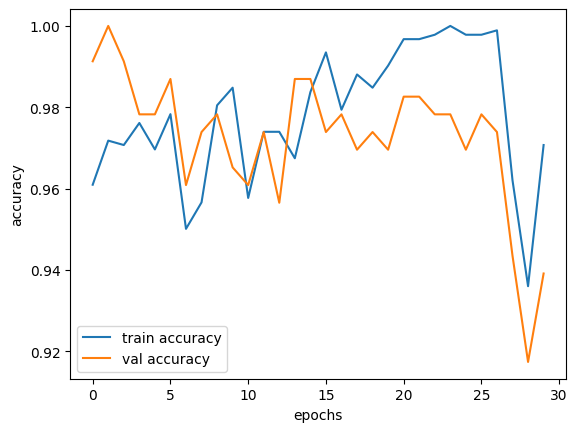

In [ ]:
#Accuracy of model
epochs = list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

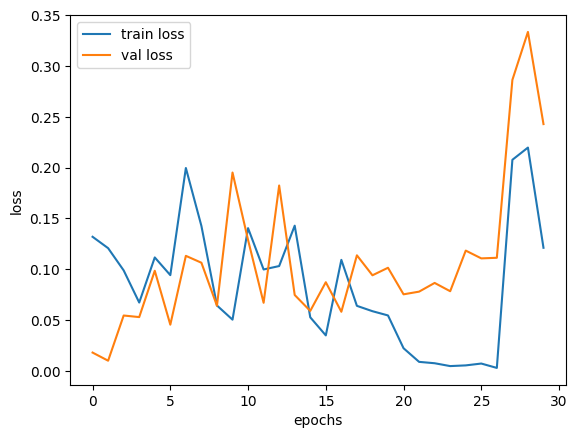

In [ ]:
#Loss of model
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()